In [173]:
import numpy as np
import pandas as pd
#usfrom scipy.optimize import fmin_cg
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=999

path = 'C:/Users/rithesh/Desktop/Apple_challenge/'
df=pd.read_excel(path+'Subscription Dataset.xlsx',header=None)

In [155]:
df=df[1:]
df.columns=['subscription_id','subscription_mode','subscription_prch_dt','subscription_cncl_dt','churn_ind','country','channel','carrier','store_id','product_line','sku','capacity','color']
df.head()

,subscription_id,subscription_mode,subscription_prch_dt,subscription_cncl_dt,churn_ind,country,channel,carrier,store_id,product_line,sku,capacity,color
1,34645276,Subscription Product Carrier,2018-09-21 00:00:00,NaN,N,Country 20,Channel 1,Carrier 7,12458799,Product Line 3,SKU70,Low,crimson
2,34645277,Subscription Product 6,2018-11-23 00:00:00,2018-12-08 00:00:00,Y,Country 20,Channel 8,Non Carrier,12054878,Product Line 3,SKU72,High,crimson
3,34645278,Subscription Product Carrier,2018-11-03 00:00:00,NaN,N,Country 20,Channel 1,Carrier 8,10457799,Product Line 3,SKU4,Very Low,Bronze
4,34645279,Subscription Product 6,2018-10-22 00:00:00,NaN,N,Country 20,Channel 3,Non Carrier,14964174,Product Line 3,SKU72,High,Bronze
5,34645280,Subscription Product 4,2018-10-20 00:00:00,NaN,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson


In [156]:
print(df.info())
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 1 to 110000
Data columns (total 13 columns):
subscription_id         110000 non-null object
subscription_mode       110000 non-null object
subscription_prch_dt    110000 non-null object
subscription_cncl_dt    10000 non-null object
churn_ind               110000 non-null object
country                 109989 non-null object
channel                 110000 non-null object
carrier                 110000 non-null object
store_id                107801 non-null object
product_line            110000 non-null object
sku                     108747 non-null object
capacity                103738 non-null object
color                   106913 non-null object
dtypes: object(13)
memory usage: 10.9+ MB
None
Shape: (110000, 13)


In [157]:
drop_list=['subscription_prch_dt','subscription_cncl_dt','subscription_id']
temp=df.drop(drop_list, axis=1)

for column in temp.columns:
    print("----------------------------------------------------------------")
    print(column+":")
    print("Unique Column values:")
    print(df[column].unique())
    print("Count of unique column values:")
    print(df[column].nunique())

----------------------------------------------------------------
subscription_mode:
Unique Column values:
['Subscription Product Carrier' 'Subscription Product 6'
 'Subscription Product 4' 'Subscription Product 8' 'Subscription Product 7'
 'Subscription Product 2' 'Subscription Product 1' 'Subscription Product 5'
 'Subscription Product 3']
Count of unique column values:
9
----------------------------------------------------------------
churn_ind:
Unique Column values:
['N' 'Y']
Count of unique column values:
2
----------------------------------------------------------------
country:
Unique Column values:
['Country 20' 'Country 10' 'Country 4' 'Country 3' 'Country 12' 'Country 1'
 'Country 7' 'Country 19' 'Country 9' 'Country 18' 'Country 15' 'Country 5'
 'Country 6' 'Country 17' 'Country 8' 'Country 2' 'Country 13' 'Country 16'
 'Country 11' 'Country 14' nan 'Country20']
Count of unique column values:
21
----------------------------------------------------------------
channel:
Unique C

In [158]:
#categorical features
temp.describe()

,subscription_mode,churn_ind,country,channel,carrier,store_id,product_line,sku,capacity,color
count,110000,110000,109989,110000,110000,107801,110000,108747,103738,106913
unique,9,2,21,16,11,2244,8,75,9,18
top,Subscription Product Carrier,N,Country20,Channel 1,Non Carrier,12458799,Product Line 3,SKU70,Low,Bronze
freq,54264,100000,65284,54264,55736,15853,76933,18136,48798,27258


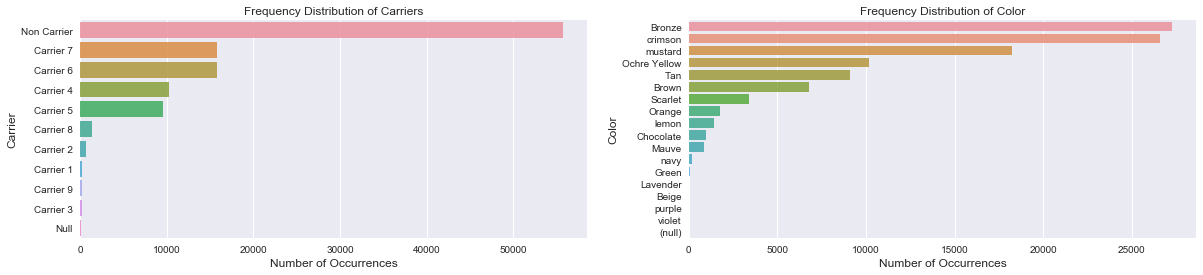

In [159]:
import seaborn as sns
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = df.carrier.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.values,carrier_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Carrier', fontsize=12)

color_count = df.color.value_counts()
sns.set(style="darkgrid")
sns.barplot(color_count.values,color_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Color')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Color', fontsize=12)
plt.show()

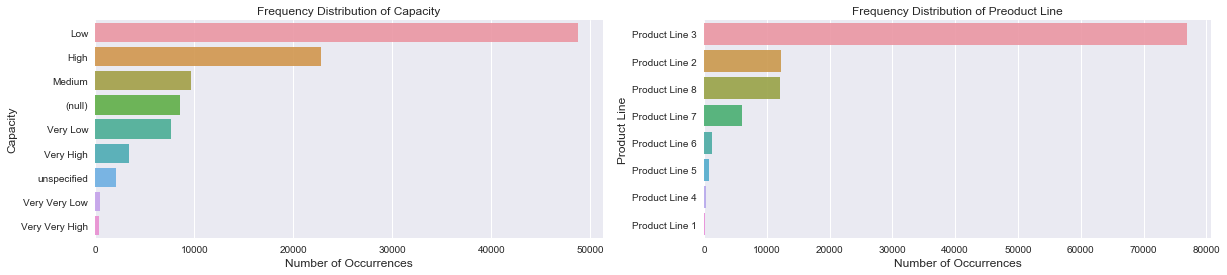

In [160]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
capacity_count = df.capacity.value_counts()
sns.set(style="darkgrid")
sns.barplot(capacity_count.values,capacity_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Capacity')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Capacity', fontsize=12)

product_line_count = df.product_line.value_counts()
sns.set(style="darkgrid")
sns.barplot(product_line_count.values,product_line_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Preoduct Line')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Product Line', fontsize=12)

plt.show()

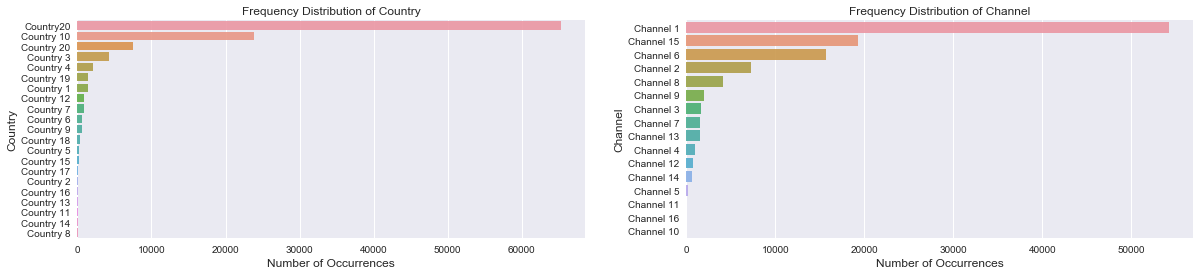

In [161]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
country_count = df.country.value_counts()
sns.set(style="darkgrid")
sns.barplot(country_count.values,country_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Country')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Country', fontsize=12)

channel_count = df.channel.value_counts()
sns.set(style="darkgrid")
sns.barplot(channel_count.values,channel_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Channel')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Channel', fontsize=12)
plt.show()

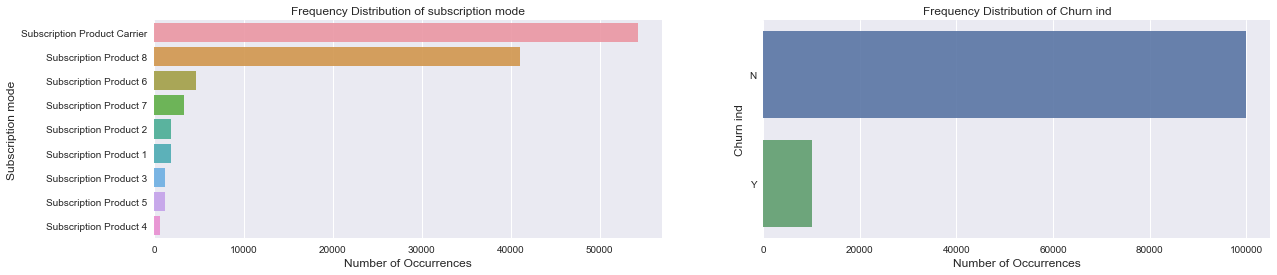

In [162]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
subscription_mode_count = df.subscription_mode.value_counts()
sns.set(style="darkgrid")
sns.barplot(subscription_mode_count.values,subscription_mode_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of subscription mode')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Subscription mode', fontsize=12)

churn_ind_count = df.churn_ind.value_counts()
sns.set(style="darkgrid")
sns.barplot(churn_ind_count.values,churn_ind_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Churn ind')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Churn ind', fontsize=12)

plt.show()

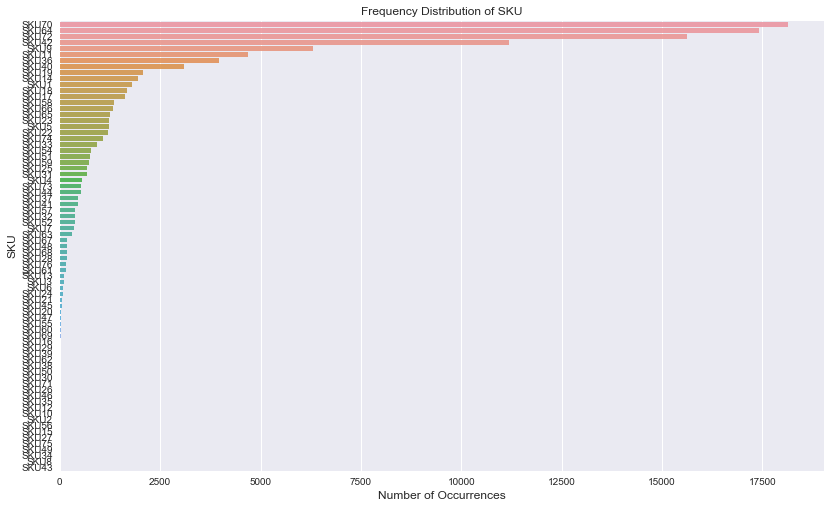

In [163]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sku_count = df.sku.value_counts()
sns.set(style="darkgrid")
sns.barplot(sku_count.values,sku_count.index, alpha=0.9)
plt.title('Frequency Distribution of SKU')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('SKU', fontsize=12)
plt.show()


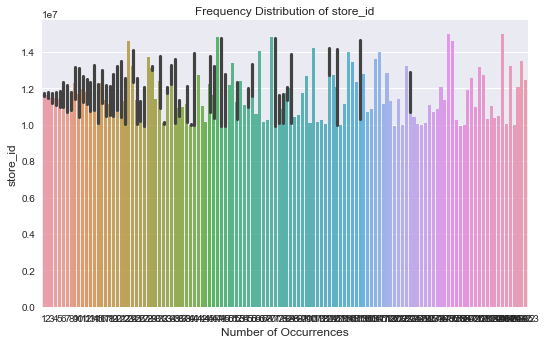

In [139]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
store_id_count=df.store_id.value_counts()
sns.set(style="darkgrid")
sns.barplot(store_id_count.values,store_id_count.index, alpha=0.9)
plt.title('Frequency Distribution of store_id')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('store_id', fontsize=12)
plt.show()

In [164]:
#Taking a look at missing values
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())})
print("---------------Missing Data-----------------")
print(missing_data)

---------------Missing Data-----------------
                      perc_missing  total_missing
subscription_id           0.000000              0
subscription_mode         0.000000              0
subscription_prch_dt      0.000000              0
subscription_cncl_dt      0.909091         100000
churn_ind                 0.000000              0
country                   0.000100             11
channel                   0.000000              0
carrier                   0.000000              0
store_id                  0.019991           2199
product_line              0.000000              0
sku                       0.011391           1253
capacity                  0.056927           6262
color                     0.028064           3087


In [165]:
#Missing value imputation (replacing with most frequent value-mode)
df['color'].replace(np.nan, "Bronze", inplace= True)
df['sku'].replace(np.nan, "SKU70", inplace= True)
df['capacity'].replace(np.nan, "Low", inplace= True)
df['store_id'].replace(np.nan,12458799, inplace= True)
df['country'].replace(np.nan,"Country20",inplace=True)
#df['subscription_cncl_dt'].replace(np.nan,"0000-00-00 00:00:00", inplace= True)

In [166]:
#creating indicators for churn
df['churn_ind']=np.where(df['churn_ind']=='Y', 0,1)
active=df.churn_ind.sum()
total=df.shape[0]
churn_rate=(total-active)/total
print("Churn Rate %:",churn_rate*100)

Churn Rate %: 9.09090909091


In [128]:
import datetime as dt
df['subscription_prch_dt'] = pd.to_datetime(df['subscription_prch_dt'])
df['subscription_cncl_dt'] = pd.to_datetime(df['subscription_cncl_dt'])
df['active_days']=df['subscription_cncl_dt']- df['subscription_prch_dt']
df['active_days']=pd.to_datetime(df['active_days'])

AttributeError: module 'pandas' has no attribute 'to_string'

In [172]:
df['pur_year'] = pd.DatetimeIndex(df['subscription_prch_dt']).year
df['pur_month'] = pd.DatetimeIndex(df['subscription_prch_dt']).month
df['cncl_year'] = pd.DatetimeIndex(df['subscription_cncl_dt']).year
df['cncl_month'] = pd.DatetimeIndex(df['subscription_cncl_dt']).month

ValueError: year 0 is out of range

In [168]:
#df.subscription_prch_dt.days
x=df.subscription_prch_dt.map(lambda x: x.strftime('%Y-%m-%d'))
y=df.subscription_cncl_dt.map(lambda x: x.strftime('%Y-%m-%d'))

AttributeError: 'float' object has no attribute 'strftime'

In [117]:
temp1=df[['subscription_prch_dt','subscription_cncl_dt','active_days']]
temp1.describe()

1            NaT
2        15 days
3            NaT
4            NaT
5            NaT
6            NaT
7            NaT
8            NaT
9            NaT
10           NaT
11           NaT
12       29 days
13           NaT
14           NaT
15           NaT
16           NaT
17           NaT
18           NaT
19           NaT
20           NaT
21           NaT
22       28 days
23           NaT
24           NaT
25           NaT
26        0 days
27           NaT
28           NaT
29           NaT
30           NaT
           ...  
109971       NaT
109972       NaT
109973       NaT
109974       NaT
109975       NaT
109976       NaT
109977       NaT
109978       NaT
109979       NaT
109980       NaT
109981   39 days
109982       NaT
109983       NaT
109984    0 days
109985       NaT
109986       NaT
109987       NaT
109988       NaT
109989       NaT
109990       NaT
109991       NaT
109992       NaT
109993       NaT
109994       NaT
109995       NaT
109996       NaT
109997       NaT
109998       N

In [169]:
temp1=df[['subscription_prch_dt','subscription_cncl_dt']]
temp1.describe()

,subscription_prch_dt,subscription_cncl_dt
count,110000,10000
unique,127,124
top,2018-09-21 00:00:00,2018-10-09 00:00:00
freq,2684,179


In [ ]:

# Second, create a variable for pickup hours
data['Pickup_hour'] = data.Pickup_date.apply(lambda x:x.hour)
data['Dropoff_hour'] = data.Dropoff_date.apply(lambda x:x.hour)